<a href="https://colab.research.google.com/github/guigoalmeida/machinelearning-escolavirtual/blob/main/01_Limpeza_Geral_da_base_EVG_resolve_NaNs_e_cria_vari%C3%A1veis_%C3%BAteis_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

# 1. Importando todas as colunas  do CSV




In [ ]:
# importando o CSV a partir do link com os separadores e encodings corretos: 
#csv_path = '/content/drive/MyDrive/Colab Notebooks/dados/20210308_escolavirtual_dadosabertos_matriculas_utf8.csv'
csv_path = '/content/drive/MyDrive/Colab Notebooks/ML_bootcamp/Dados/20210308_testebug.csv'
df = pd.read_csv(
     csv_path,
     sep='|',
     encoding='UTF-8')
# com o encoding Latin-1, acentos não eram reconhecidos adequadamente, o que prejudicava a criação da variável 'capital'
# preferi trazer para cá todas as colunas, assim mantemos um CSV completo, inteiro e arrumado. No próximo caderno, filtramos só o que formos usar.

    #  usecols=['dt_matricula', 'sexo', 'data_nascimento', 'cod_curso', 'carga_horaria', 
    #          'dt_inicio_insc', 'dt_fim_insc', 'dt_inicio',  'dt_fim', 'sit_matricula',  'poder',
    #           'esfera', 'municipio_pessoa', 'uf_pessoa', 'conteudista']
    #  )


In [ ]:
df.shape

(4192238, 26)

# 2. Eliminando casos antigos e desnecessários


## 2.1. Verificação da distribuição de casos ao longo do tempo

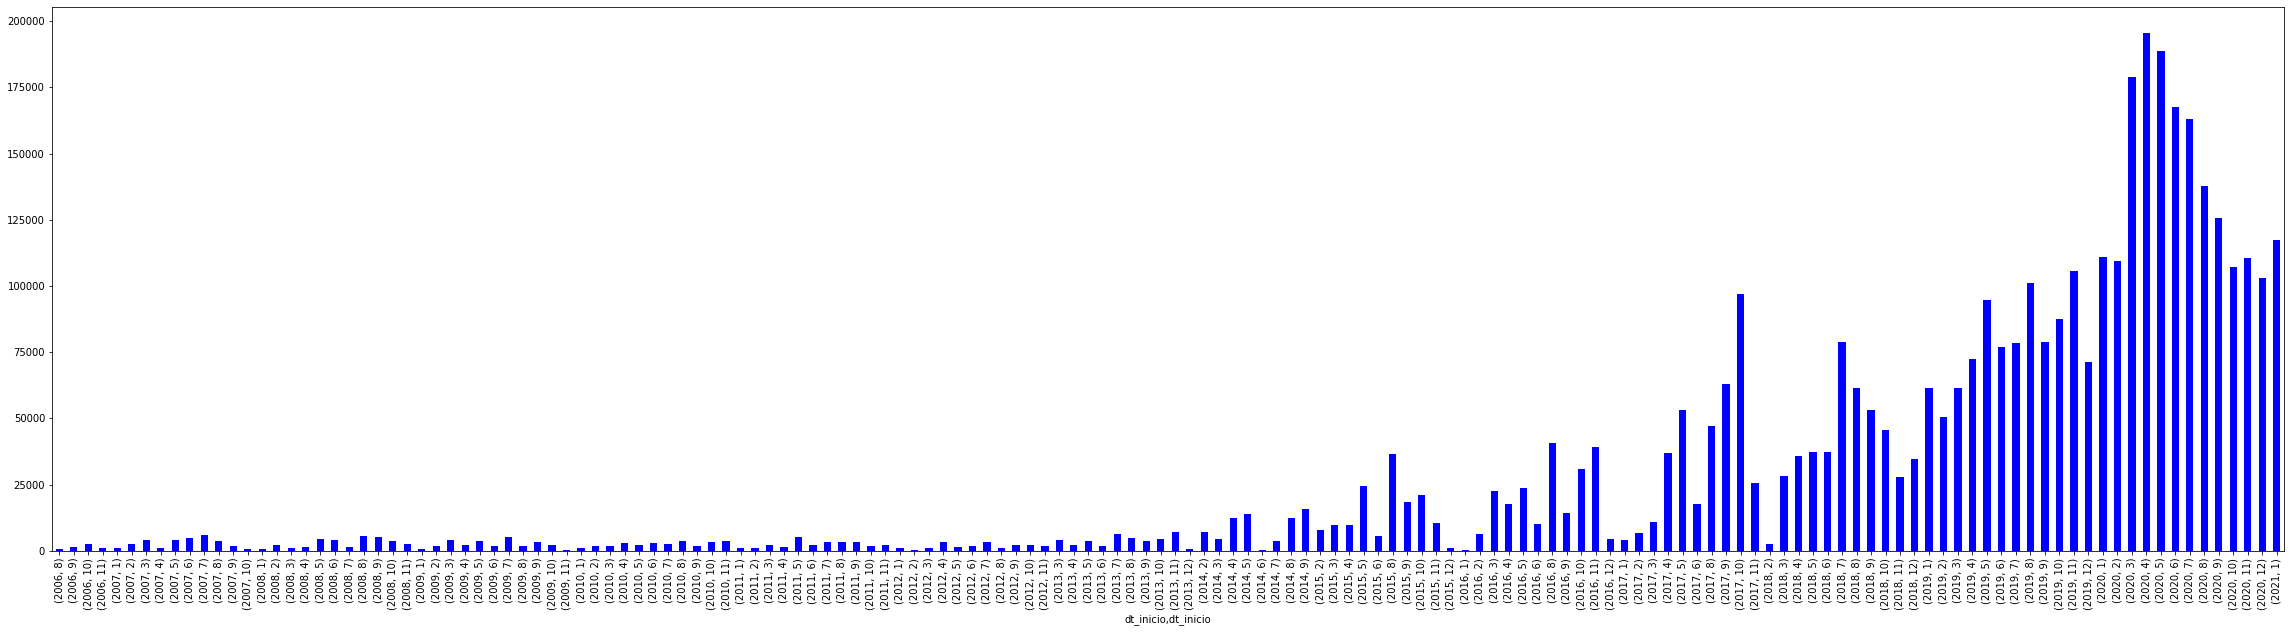

In [ ]:
# importndo datetime
from datetime import datetime

# convertendo e criando nova coluna 'mes_inicio'
df['dt_inicio'] = pd.to_datetime(df['dt_inicio'], format="%Y-%m-%d")
df['mes_inicio'] = pd.to_datetime(df.dt_inicio).dt.to_period('m')

# distribuição do quantitativo de cursos por mês, desde o início
plt.figure(figsize=(40, 10))
df['dt_inicio'].groupby([df['dt_inicio'].dt.year, df['dt_inicio'].dt.month] ).count().plot(kind='bar', color = 'blue')

## 2.2. Drop valores anteriores a 2018, que tem menos dados completos e menor potencial preditivo


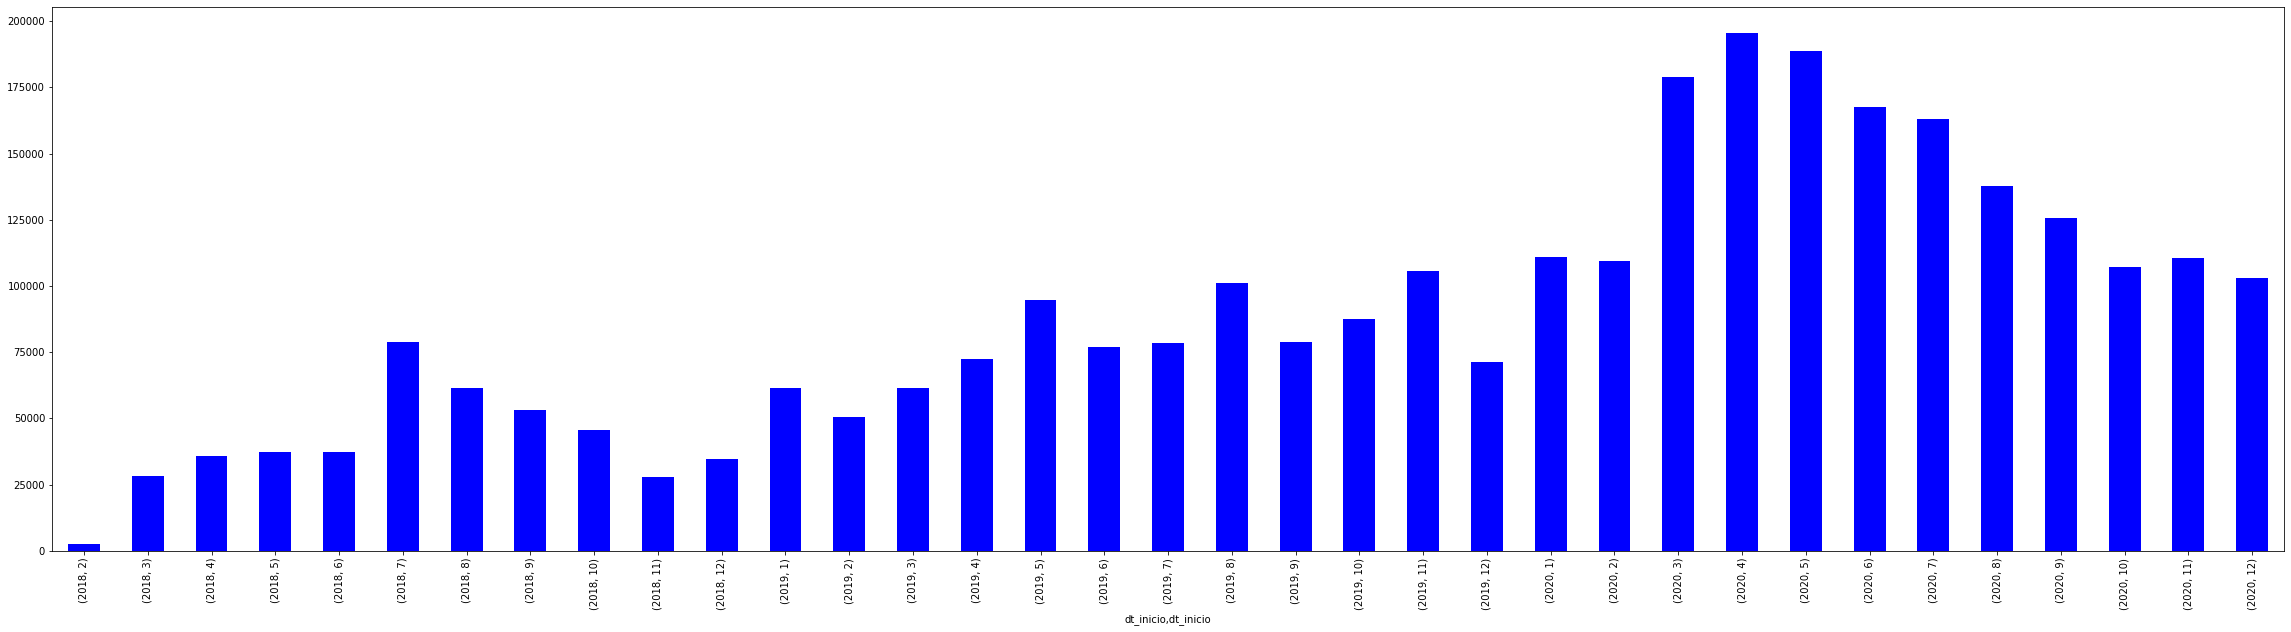

In [ ]:

# atualizando dataframe para manter só valores de 2018, 2019 e 2020
df=df[(df['mes_inicio'] >= '2018-01') & (df['mes_inicio'] < '2021-01')]

# distribuição do quantitativo de cursos por mês, entre 2018 e 2020
plt.figure(figsize=(40, 10))
df['dt_inicio'].groupby([df['dt_inicio'].dt.year, df['dt_inicio'].dt.month] ).count().plot(kind='bar', color = 'blue')

In [ ]:
df.shape

(3082154, 27)

---

# 3. Resolvendo os valores nulos

## 3.1. Identificando as colunas com valores faltantes

In [ ]:
df.isnull().sum()

cod_matricula             0
dt_matricula              0
cpf                    9345
nome                      0
sexo                      0
data_nascimento           0
nacionalidade             0
login_liferay       2530307
cod_turma                 0
nome_turma                0
modalidade_turma          0
cod_curso                 0
nome_curso                0
carga_horaria             0
dt_inicio_insc            0
dt_fim_insc               0
dt_inicio                 0
dt_fim                    0
sit_turma                 0
sit_matricula             0
poder               1871534
esfera              1293082
instituicao         2059522
municipio_pessoa      28493
uf_pessoa             28493
conteudista               0
mes_inicio                0
dtype: int64

## 3.2. Resolvendo CPF e login liferay

In [ ]:
df['cpf'] = df['cpf'].fillna(value='Nao declarado')
df['login_liferay'] = df['municipio_pessoa'].fillna(value='Nao declarado')

## 3.3. Tratando municípios e estados - preenchendo os NaNs (um terço dos dados) como 'Nao declarado'

In [ ]:
df['uf_pessoa'].value_counts().to_dict()

{'AC': 21733,
 'AL': 55815,
 'AM': 57223,
 'AP': 16789,
 'BA': 154913,
 'CE': 125512,
 'DF': 280633,
 'ES': 70717,
 'GO': 116569,
 'MA': 49327,
 'MG': 302062,
 'MS': 48765,
 'MT': 95184,
 'PA': 98348,
 'PB': 50673,
 'PE': 116363,
 'PI': 46542,
 'PR': 145102,
 'RJ': 292127,
 'RN': 59401,
 'RO': 34119,
 'RR': 25848,
 'RS': 152374,
 'SC': 79641,
 'SE': 32016,
 'SP': 505266,
 'TO': 20599}

In [ ]:
df['uf_pessoa'] = df['uf_pessoa'].fillna(value='Nao declarado')
df['municipio_pessoa'] = df['municipio_pessoa'].fillna(value='Nao declarado')

In [ ]:
df['uf_pessoa'].value_counts().to_dict()

{'AC': 21733,
 'AL': 55815,
 'AM': 57223,
 'AP': 16789,
 'BA': 154913,
 'CE': 125512,
 'DF': 280633,
 'ES': 70717,
 'GO': 116569,
 'MA': 49327,
 'MG': 302062,
 'MS': 48765,
 'MT': 95184,
 'Nao declarado': 28493,
 'PA': 98348,
 'PB': 50673,
 'PE': 116363,
 'PI': 46542,
 'PR': 145102,
 'RJ': 292127,
 'RN': 59401,
 'RO': 34119,
 'RR': 25848,
 'RS': 152374,
 'SC': 79641,
 'SE': 32016,
 'SP': 505266,
 'TO': 20599}

## 3.4. Tratando 'poder' e esfera'

In [ ]:
df['poder'].value_counts().to_dict()

{'Executivo': 1093704, 'Judiciario': 83105, 'Legislativo': 33811}

In [ ]:
df['esfera'].value_counts().to_dict()

{'Estadual': 642079, 'Federal': 710024, 'Municipal': 436969}

In [ ]:
df['poder'] = df['poder'].fillna(value='Nao declarado')
df['esfera'] = df['esfera'].fillna(value='Nao declarado')

In [ ]:
df['poder'].value_counts().to_dict()

{'Executivo': 1093704,
 'Judiciario': 83105,
 'Legislativo': 33811,
 'Nao declarado': 1871534}

In [ ]:
df['esfera'].value_counts().to_dict()

{'Estadual': 642079,
 'Federal': 710024,
 'Municipal': 436969,
 'Nao declarado': 1293082}

## 3.5. Tratando instituição

In [ ]:
df['instituicao'].value_counts().to_dict()
# existe uma categoria 'Nao se aplica' - vamos incluir nela os NaNs por enquanto

{'Advocacia Geral da União': 1157,
 'Agência Brasileira Gestora de Fundos Garantidores e Garantias S.A.': 57,
 'Agência Brasileira de Inteligência': 172,
 'Agência Brasileira de Promoção de Exportações e Investimentos - Apex': 1106,
 'Agência Espacial Brasileira': 326,
 'Agência Nacional de Aviação Civil': 1381,
 'Agência Nacional de Energia Elétrica': 889,
 'Agência Nacional de Mineração': 708,
 'Agência Nacional de Saúde Suplementar': 920,
 'Agência Nacional de Telecomunicações': 1908,
 'Agência Nacional de Transportes Aquaviários': 622,
 'Agência Nacional de Transportes Terrestres': 2265,
 'Agência Nacional de Vigilância Sanitária': 2340,
 'Agência Nacional de Águas': 651,
 'Agência Nacional do Cinema': 849,
 'Agência Nacional do Petróleo, Gás Natural e Biocombustíveis': 1090,
 'Amazônia Azul Tecnologias de Defesa S.A': 1183,
 'Arquivo Nacional': 1137,
 'Assembleia Legislativa do Estado': 9069,
 'Assessoria Especial do Presidente da República': 16,
 'Autoridade Nacional de Proteção 

In [ ]:
df['instituicao'] = df['instituicao'].fillna(value='Nao se aplica')

In [ ]:
df['instituicao'].value_counts().to_dict()

{'Advocacia Geral da União': 1157,
 'Agência Brasileira Gestora de Fundos Garantidores e Garantias S.A.': 57,
 'Agência Brasileira de Inteligência': 172,
 'Agência Brasileira de Promoção de Exportações e Investimentos - Apex': 1106,
 'Agência Espacial Brasileira': 326,
 'Agência Nacional de Aviação Civil': 1381,
 'Agência Nacional de Energia Elétrica': 889,
 'Agência Nacional de Mineração': 708,
 'Agência Nacional de Saúde Suplementar': 920,
 'Agência Nacional de Telecomunicações': 1908,
 'Agência Nacional de Transportes Aquaviários': 622,
 'Agência Nacional de Transportes Terrestres': 2265,
 'Agência Nacional de Vigilância Sanitária': 2340,
 'Agência Nacional de Águas': 651,
 'Agência Nacional do Cinema': 849,
 'Agência Nacional do Petróleo, Gás Natural e Biocombustíveis': 1090,
 'Amazônia Azul Tecnologias de Defesa S.A': 1183,
 'Arquivo Nacional': 1137,
 'Assembleia Legislativa do Estado': 9069,
 'Assessoria Especial do Presidente da República': 16,
 'Autoridade Nacional de Proteção 

## 3.6. Valores faltantes resolvidos!

In [ ]:
df.isnull().sum()

cod_matricula       0
dt_matricula        0
cpf                 0
nome                0
sexo                0
data_nascimento     0
nacionalidade       0
login_liferay       0
cod_turma           0
nome_turma          0
modalidade_turma    0
cod_curso           0
nome_curso          0
carga_horaria       0
dt_inicio_insc      0
dt_fim_insc         0
dt_inicio           0
dt_fim              0
sit_turma           0
sit_matricula       0
poder               0
esfera              0
instituicao         0
municipio_pessoa    0
uf_pessoa           0
conteudista         0
mes_inicio          0
dtype: int64

# 4. Criando novas variáveis úteis

## 4.1. Acertando as demais datas para conseguir trabalhar

In [ ]:
# resolvendo alguns problemas com datas preenchidas de forma errada, com a função date_transform: 

def date_transform(serie):
  serie.replace('^1[0,1,2,3,4,5,6,7,8]','19',regex=True,inplace=True)
  serie.replace('^[0,3,4,5,6,7,8,9]','1',regex=True,inplace=True)
  serie.replace('^2[2,3,4,5,6,7,8,9]','20',regex=True,inplace=True)
  return serie

# date transform no data_nascimento tem que rodar duas vezes
df['data_nascimento'] = date_transform(df['data_nascimento'])
df['data_nascimento'] = date_transform(df['data_nascimento'])
df['dt_inicio'] = date_transform(df['dt_inicio'])

In [ ]:
# convertendo todas as datas em datetime:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], format="%Y-%m-%d")
df['dt_matricula'] = pd.to_datetime(df['dt_matricula'], format="%Y-%m-%d")
df['dt_inicio_insc'] = pd.to_datetime(df['dt_inicio_insc'], format="%Y-%m-%d")
df['dt_fim_insc'] = pd.to_datetime(df['dt_fim_insc'], format="%Y-%m-%d")
df['dt_fim'] = pd.to_datetime(df['dt_fim'], format="%Y-%m-%d")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082154 entries, 0 to 4192237
Data columns (total 27 columns):
 #   Column            Dtype         
---  ------            -----         
 0   cod_matricula     int64         
 1   dt_matricula      datetime64[ns]
 2   cpf               object        
 3   nome              object        
 4   sexo              object        
 5   data_nascimento   datetime64[ns]
 6   nacionalidade     int64         
 7   login_liferay     object        
 8   cod_turma         int64         
 9   nome_turma        object        
 10  modalidade_turma  object        
 11  cod_curso         int64         
 12  nome_curso        object        
 13  carga_horaria     int64         
 14  dt_inicio_insc    datetime64[ns]
 15  dt_fim_insc       datetime64[ns]
 16  dt_inicio         datetime64[ns]
 17  dt_fim            datetime64[ns]
 18  sit_turma         object        
 19  sit_matricula     object        
 20  poder             object        
 21  esfera  

## 4.2. Criando novas colunas úteis para auxiliar a predição: 
* duração do curso
* idade no começo do curso (faixas)
* Capital
* Área temática


### 4.2.1. Duração do curso

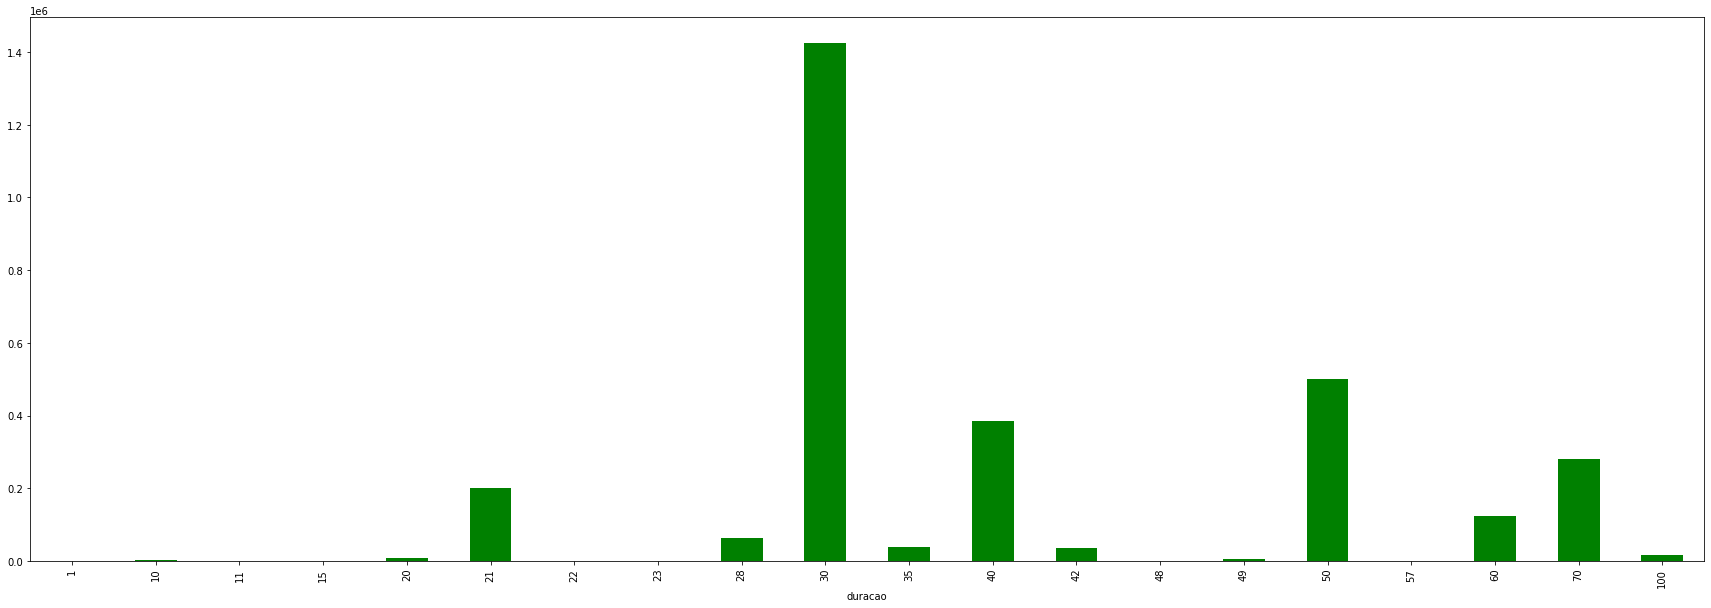

In [ ]:
#Criar coluna duracao, mostrar a distribuicao 

# cria a coluna duracao
df['duracao'] = df['dt_fim']-df['dt_inicio']

# histograma para visualizar a distribuição 
plt.figure(figsize=(30, 10))
df['duracao'].groupby(df['duracao'].dt.days).count().plot(kind='bar', color = 'green')

### 4.2.2. Criar 'idade'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


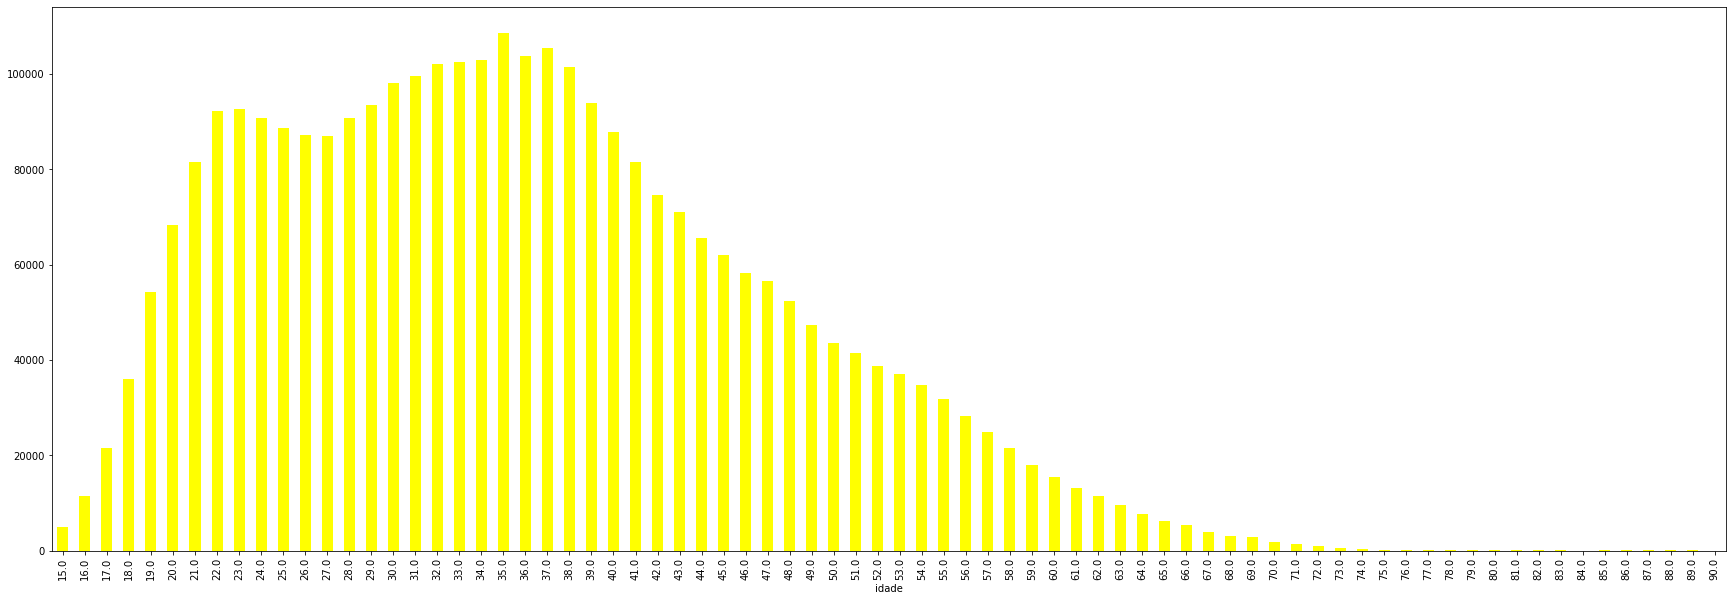

In [ ]:
#Subtraio a data de início da data de nascimento para saber a idade no início do curso
df['idade'] = (df['dt_inicio'] - df['data_nascimento']).apply(lambda x:(x.days)//365)

#Excluindo as idades de todo mundo acima de 90 e abaixo de 15 anos de idade - total de 9249
df.idade[df.idade > 90] = np.nan
df.idade[df.idade < 15] = np.nan

#Ajustando as idades excedentes para a mediana Média 36 e Mediana 35
df.idade[df.idade.isna()] = 35

# histograma para visualizar a distribuição 
plt.figure(figsize=(30, 10))
df['idade'].groupby(df['idade']).count().plot(kind='bar', color = 'yellow')

### 4.2.3. Criação de coluna "Capital" para indicar as capitais de Estado

In [ ]:
df.municipio_pessoa = df.municipio_pessoa.str.strip()
cap = ['Rio Branco', 'Macapá', 'Manaus', 'Belém', 'Porto Velho', 'Boa Vista', 'Palmas', 'Maceió', 'Salvador', 'Fortaleza', 'São Luís', 'João Pessoa', 'Recife', 'Teresina', 'Natal', 'Aracaju', 'Goiânia', 'Cuiabá', 'Campo Grande', 'Brasília', 'Vitória', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro', 'Curitiba', 'Porto Alegre', 'Florianópolis']

#Criação da coluna capital e atribuição de valor 1 para capitais e 0 para demais
df['capital'] = df['municipio_pessoa'].apply(lambda x: 1 if x in cap else 0)


In [ ]:
df['capital'].value_counts().to_dict()

{0: 1567275, 1: 1514879}

### 4.2.4 Importando 'áreas temáticas' de CSV próprio e mesclando ao dataframe

In [ ]:
#Importando csv com todos os códigos de cursos com áreas
url_cod_cursos_corrigido = '/content/drive/MyDrive/Colab Notebooks/ML_bootcamp/Dados/cod_cursos.csv' # aqui vai caminho do arquivo
df_cod_cursos = pd.read_csv(url_cod_cursos_corrigido, sep=';', encoding='latin-1')

# fazendo merge com áreas temáticas (cod_cursos.csv) 
df = pd.merge(df, df_cod_cursos, left_on="cod_curso", right_on="id_curso", how='left')
df.drop(['id_curso'], axis=1, inplace=True)

### 4.2.5. Arrumar variavel target (sit_matricula)

In [ ]:
df['sit_matricula'].value_counts().to_dict()

{'Concluida': 1409984,
 'Desistente': 1496296,
 'Não Concluído': 18047,
 'Reprovado': 108820,
 'Trancada': 49007}

In [ ]:
#Apagar as matrículas com situação NÃO CONCLUÍDO (ou seja, que estão cursando ainda, ou que ainda vão cursar)
df = df.drop(df[df.sit_matricula == 'Não Concluído'].index)


In [ ]:
#Criar nova coluna SITUACAO e atribuir 1 quando a matricula for concluída
# com isso, as situações de reprovação, abandono ou trancamento ficam iguais a 
df['situacao'] = 0
df['situacao'][df.sit_matricula == 'Concluida'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 4.2.6 Todas as variáveis adicionais criadas!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064107 entries, 0 to 3082153
Data columns (total 32 columns):
 #   Column            Dtype          
---  ------            -----          
 0   cod_matricula     int64          
 1   dt_matricula      datetime64[ns] 
 2   cpf               object         
 3   nome              object         
 4   sexo              object         
 5   data_nascimento   datetime64[ns] 
 6   nacionalidade     int64          
 7   login_liferay     object         
 8   cod_turma         int64          
 9   nome_turma        object         
 10  modalidade_turma  object         
 11  cod_curso         int64          
 12  nome_curso        object         
 13  carga_horaria     int64          
 14  dt_inicio_insc    datetime64[ns] 
 15  dt_fim_insc       datetime64[ns] 
 16  dt_inicio         datetime64[ns] 
 17  dt_fim            datetime64[ns] 
 18  sit_turma         object         
 19  sit_matricula     object         
 20  poder             object

# 5. Cria novo CSV completo com todas as variáveis ajustadas e sem valores nulos

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_bootcamp/Dados/EVG_completo_corrigido.csv')

Link para a base final gerada: https://drive.google.com/file/d/1e8eWyIKMn12n3aAO7VdOHbaRUuy2XSnf/view?usp=sharing


# 6. Reflexões finais
Nesse caso, a exclusão de valores correlacionados ou a criação de variáveis *dummy* ficou para o próximo caderno. 

Isso porque resgatar variáveis antigas, ou escolher novas formas de encoding, ou escolher quais variáveis manter ou quais retransformar pode ser parte de experimentos / calibragem dos algoritmos de *machine learning*. 

Ainda, em alguns casos, como 'esfera' e 'poder', a transformação de NaNs em 'não declarado' gerou um grande desbalanceamento das classes correspondentes. Assim, possivelmente várias linhas terão que ser descartadas, e treino/teste feito de forma proporcional, caso se pretenda explorar essa dimensão. 

## 6.1. Exclusão de variáveis

In [ ]:
# possível código para excluir variáveis - usar caso necessário

# excluir: id_curso(que surge com merge de nome_tematica), código de matricula, CPF, Nome do aluno, login_liferay, país de origem, modalidade da turma, código de turma, nome da turma, código de curso, situacao da turma, instituição
# df.drop(['id_curso','cod_matricula','cpf','nome','nacionalidade','login_liferay','cod_turma','nome_turma','modalidade_turma','nome_curso','sit_turma','instituicao'], axis=1, inplace=True)

## 6.2. Criação de dummies para as variáveis categóricas

In [ ]:
# possível código - a ajustar e editar - para criar variáveis categóricas

# cat_cols = ['municipio_pessoa','uf_pessoa', 'conteudista', 'sexo']
# num_cols = ['cod_curso', 'carga_horaria', 'idade']
# date_cols = ['duracao','mes_inicio']

# df_cat_cols = pd.get_dummies(df.loc[:,cat_cols])
# print(X.shape)
# df_cat_cols.head()
# df_num_cols = df[num_cols]
# print(df_num_cols.shape)
# df_num_cols.head()


# cat_cols = ['municipio_pessoa','uf_pessoa', 'conteudista', 'sexo']
# num_cols = ['cod_curso', 'carga_horaria', 'idade']

# date_cols = ['duracao','mes_inicio']


# df_cat_cols = pd.get_dummies(df.loc[:,cat_cols])
# print(X.shape)
# df_cat_cols.head()
# df_num_cols = df[num_cols]
# print(df_num_cols.shape)
# df_num_cols.head()
# dfl = pd.concat([df_cat_cols,df_num_cols], axis=1)
# print(df_tudo.shape)
# df_tudo.head()